In [1]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import sklearn, pandas
import librosa, librosa.display

In [2]:
metal_songs = [
    librosa.load(p)[0] for p in Path().glob('genres/metal/*.au')
]

In [3]:
blues_songs = [
    librosa.load(p)[0] for p in Path().glob('genres/blues/*.au')
]

In [4]:
len(metal_songs)

100

In [5]:
len(blues_songs)

100

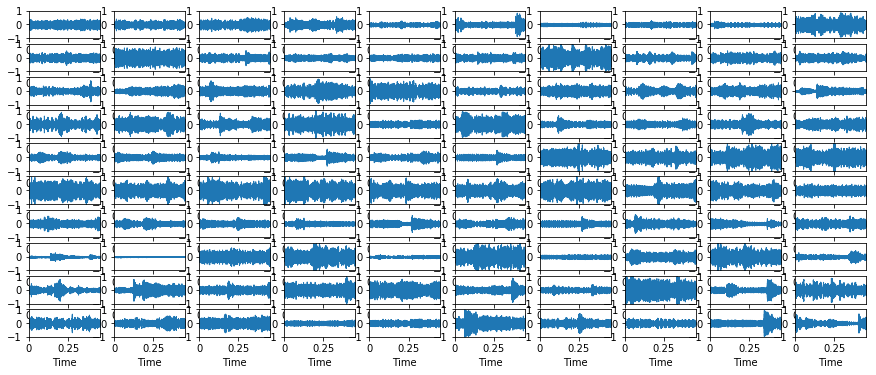

In [6]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(metal_songs):
    plt.subplot(10, 10, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

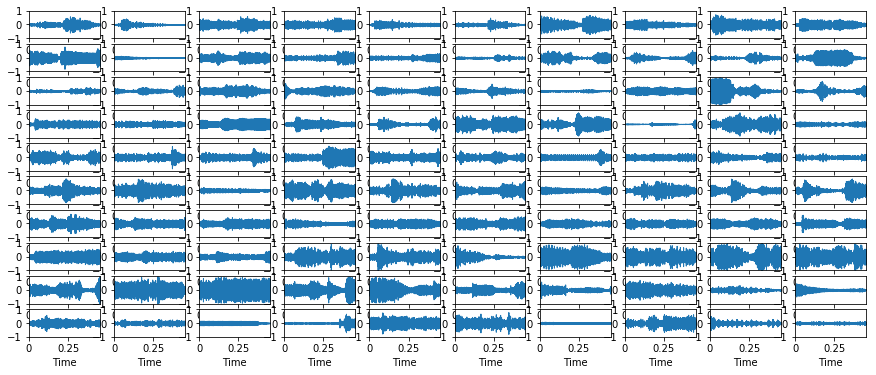

In [7]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(blues_songs):
    plt.subplot(10, 10, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [8]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [9]:
metal_features = numpy.array([extract_features(x) for x in metal_songs])
blues_features = numpy.array([extract_features(x) for x in blues_songs])

Text(0,0.5,'Count')

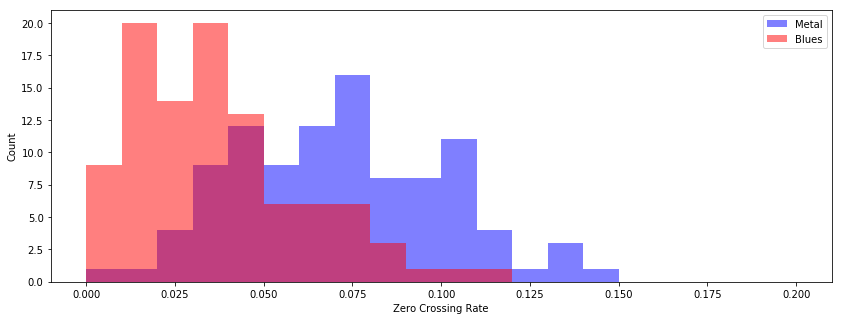

In [10]:
plt.figure(figsize=(14, 5))
plt.hist(metal_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(blues_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('Metal', 'Blues'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0,0.5,'Count')

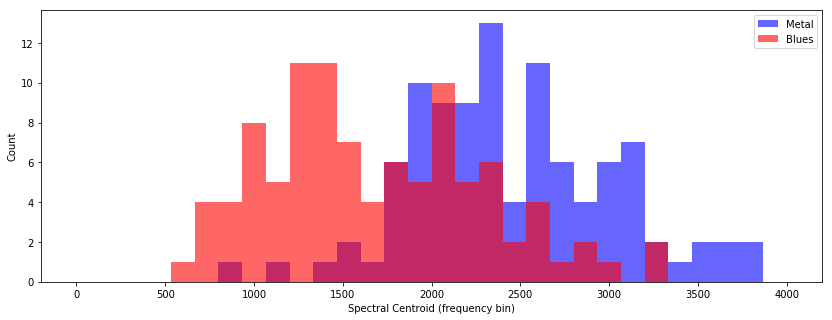

In [11]:
plt.figure(figsize=(14, 5))
plt.hist(metal_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(blues_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('Metal', 'Blues'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [12]:
feature_table = numpy.vstack((metal_features, blues_features))
print(feature_table.shape)

(200, 2)


In [13]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0,0.5,'Spectral Centroid')

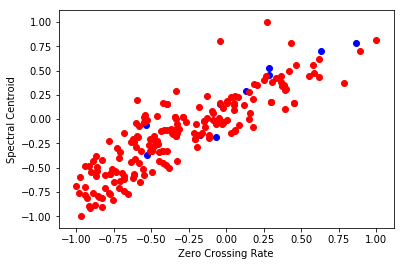

In [14]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [15]:
metal_song  = 'genres/metal/metal.00000.au'
x_metal, sr_metal = librosa.load(metal_song, duration=30)

In [16]:
blues_song = 'genres/blues/blues.00000.au'
x_blues, sr_blues = librosa.load(blues_song, duration=30)

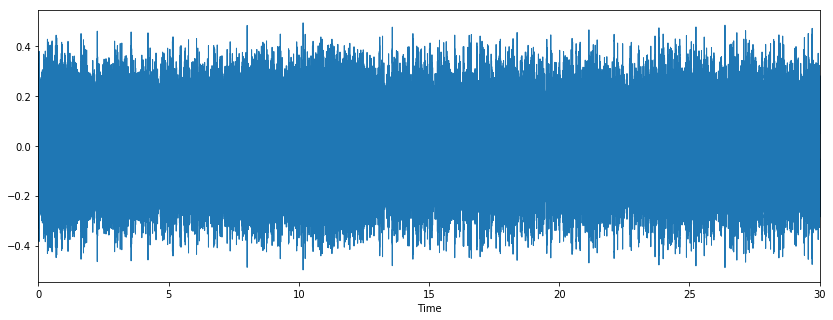

In [17]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_metal, sr_metal)

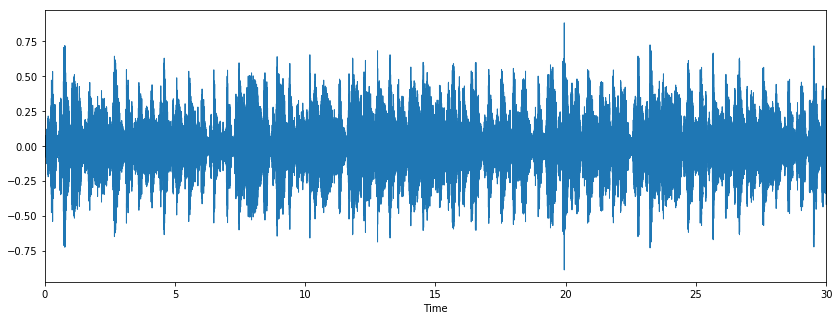

In [18]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_blues, sr_blues)

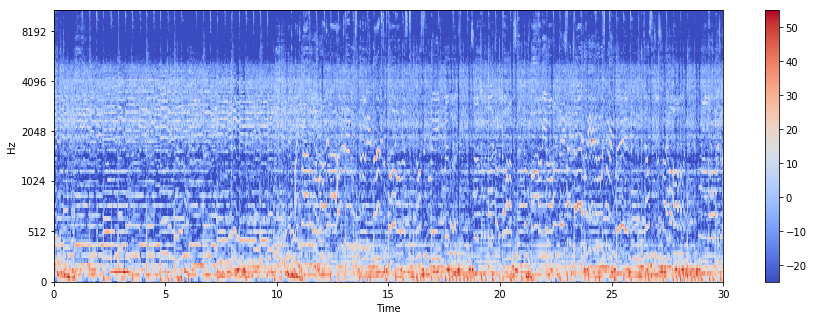

In [19]:
S_metal = librosa.feature.melspectrogram(x_metal, sr=sr_metal)
Sdb_metal = librosa.amplitude_to_db(S_metal)
plt.figure(figsize=(15, 5))
librosa.display.specshow(Sdb_metal, sr=sr_metal, x_axis='time', y_axis='mel')
plt.colorbar()

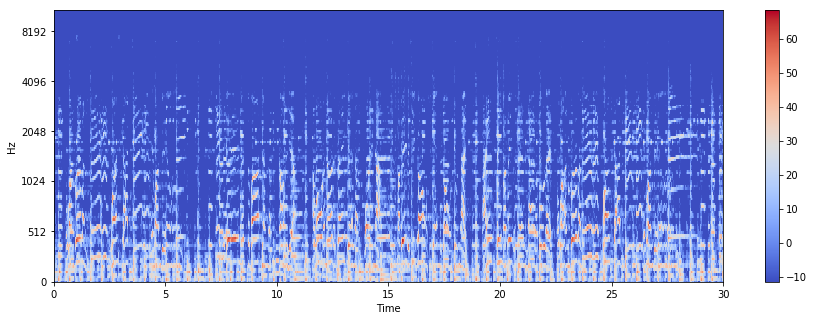

In [20]:
S_blues = librosa.feature.melspectrogram(x_blues, sr=sr_blues)
Sdb_blues = librosa.amplitude_to_db(S_blues)
plt.figure(figsize=(15, 5))
librosa.display.specshow(Sdb_blues, sr=sr_blues, x_axis='time', y_axis='mel')
plt.colorbar()

In [21]:
n_mfcc = 12
mfcc_metal = librosa.feature.mfcc(x_metal, sr=sr_metal, n_mfcc=n_mfcc).T

In [22]:
mfcc_metal.shape

(1292, 12)

In [23]:
scaler = sklearn.preprocessing.StandardScaler()

In [24]:
mfcc_metal_scaled = scaler.fit_transform(mfcc_metal)

In [25]:
mfcc_metal_scaled.mean(axis=0)

array([-3.51971634e-16,  3.29973407e-16,  2.19982271e-17, -3.29973407e-16,
        5.49955678e-17, -4.39964542e-17, -4.39964542e-17, -1.09991136e-16,
        3.84968974e-17,  1.31989363e-16,  0.00000000e+00, -1.09991136e-17])

In [26]:
mfcc_metal_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
mfcc_blues = librosa.feature.mfcc(x_blues, sr=sr_blues, n_mfcc=n_mfcc).T

In [28]:
print(mfcc_metal.shape)
print(mfcc_blues.shape)

(1292, 12)
(1292, 12)


In [29]:
mfcc_blues_scaled = scaler.transform(mfcc_blues)

In [30]:
mfcc_blues_scaled.mean(axis=0)

array([-3.24290083,  5.09044845, -0.47545914, -0.26875426, -1.19853948,
        0.93897367, -2.34780824,  0.80402531, -2.40443889,  0.60755842,
       -0.56910496, -0.13041171])

In [31]:
mfcc_blues_scaled.std(axis=0)

array([2.70612757, 1.22510797, 0.95137661, 0.82563422, 1.20125407,
       1.04435271, 1.00686417, 1.02902673, 1.19536479, 1.11041214,
       1.04579924, 0.97153259])

In [32]:
features = numpy.vstack((mfcc_metal_scaled, mfcc_blues_scaled))

In [33]:
features.shape

(2584, 12)

In [34]:
labels = numpy.concatenate((numpy.zeros(len(mfcc_metal_scaled)), numpy.ones(len(mfcc_blues_scaled))))

In [35]:
model = sklearn.svm.SVC()

In [36]:
model.fit(features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
x_metal_test, sr_metal = librosa.load(metal_song, duration=10, offset=120)

In [38]:
x_blues_test, sr_blues = librosa.load(blues_song, duration=10, offset=120)